In [86]:
import numpy as np
import pandas as pd
import math


df = pd.read_csv("data/df_b_processed.csv")
df = df.drop_duplicates()



df.drop('hours',axis=1)



def local_businesses(dataset, latitude, longitude, miles):
    # latitude and longitude define the center of the station, miles designates 
    # how big of a circle/area you want to draw around the station
    rows=[]
    for index in range(len(dataset)):
        lat=dataset.loc[index]['latitude']
        long=dataset.loc[index]['longitude']
        distance = math.hypot(lat-latitude,long-longitude)
        if distance < miles/69:
            rows.append(dataset.iloc[index])
    return pd.DataFrame(rows).reset_index(drop=True)
df_located = (local_businesses(df,39.955,-75.15,1))
df_located.head()
# print(len(df_located))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,GWGXTKR0Fhdvzf_isDqJug,"David Gower, Jr. - Coldwell Banker Preferred","325 Chestnut St, Ste 1300",Philadelphia,PA,19106.0,39.949027,-75.147190,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Real Estate, Home Services, Real Estate Agents","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
3,h-y5azB-VlQAT3m7Ff2g2Q,P's & Q's - Premium Quality,820 S St,Philadelphia,PA,19147.0,39.942515,-75.156468,5.0,16,1,"{'BusinessParking': ""{'garage': False, 'street...","Fashion, Shopping, Men's Clothing",NaN
4,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107.0,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."


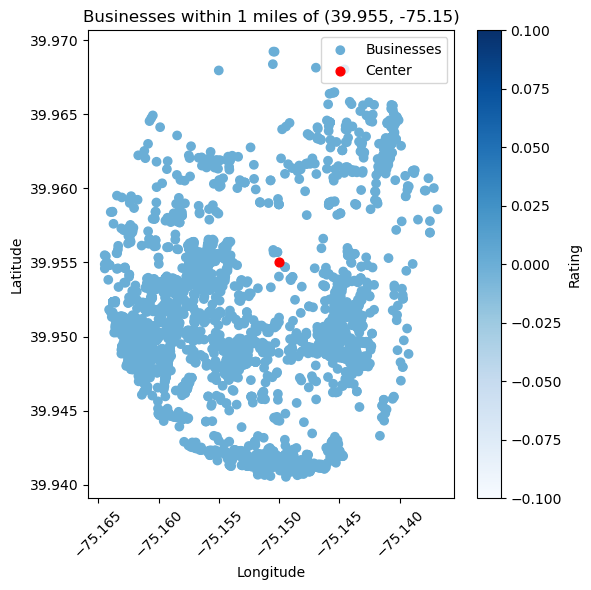

In [87]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_businesses(df_local,latitude, longitude, miles):
    if 'rating' not in df_local.columns:
        df_local['rating']=0.0
    df_local['rating']=df_local['rating'].fillna(0.0)   
    ratings = df_local['rating'] 
    norm = (ratings -ratings.min())/(ratings.max()-ratings.min()+1e-10)#####  
    
    fig,ax = plt.subplots(figsize=(6,6))
    scatter = ax.scatter(df_local['longitude'],df_local['latitude'],c=norm,cmap='Blues',label='Businesses')
    ax.scatter(x=longitude,y=latitude,color='red',marker='o',s=40,label = 'Center')
    fig.colorbar(scatter,label='Rating')
    ax.tick_params(axis='x', labelrotation=45)  
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"Businesses within {miles} miles of ({latitude}, {longitude})")
    ax.legend()
    plt.tight_layout()
    plt.show()
(plot_businesses(df_located,39.955,-75.15,1))
